<a href="https://colab.research.google.com/github/KellLima/analise-de-dados-predicao/blob/main/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('/content/base-alugueis-sp.csv')
dados.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [ ]:
dados.tail()

,address,district,area,bedrooms,garage,type,rent,total
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200
11656,Rua Alexandre Dumas,Santo Amaro,110,3,1,Casa,3300,3440


In [ ]:
dados.duplicated().sum()

0

In [ ]:
dados.isnull().sum()

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [ ]:
dados['rent'] = dados['rent'].astype(float) #Convertendo para float, já que representam dados monetários.

In [ ]:
dados['total'] = dados['total'].astype(float)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   address   11657 non-null  object 
 1   district  11657 non-null  object 
 2   area      11657 non-null  int64  
 3   bedrooms  11657 non-null  int64  
 4   garage    11657 non-null  int64  
 5   type      11657 non-null  object 
 6   rent      11657 non-null  float64
 7   total     11657 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 728.7+ KB


In [ ]:
#Renomeando para o português para facilitar a interpretação e compreensão dos dados com todos
dados = dados.rename(columns={
    'address':'endereco',
    'district': 'bairro',
    'bedrooms': 'quartos',
    'garage': 'vagas_garagem',
    'type': 'tipo',
    'rent': 'aluguel'
})
dados.head()

,endereco,bairro,area,quartos,vagas_garagem,tipo,aluguel,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400.0,2939.0
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030.0,1345.0
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000.0,4661.0
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750.0,1954.0
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000.0,4654.0


In [ ]:
dados.describe()

,area,quartos,vagas_garagem,aluguel,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [ ]:
dados_sem_aluguel = dados.drop(columns=['aluguel'])
dados_sem_aluguel

,endereco,bairro,area,quartos,vagas_garagem,tipo,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2939.0
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1345.0
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4661.0
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1954.0
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4654.0
...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,5778.0
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,17480.0
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,5467.0
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,10200.0


In [ ]:
dados_sem_aluguel.tipo.value_counts(normalize=True)

tipo
Apartamento           0.617140
Casa                  0.243716
Studio e kitnet       0.118470
Casa em condomínio    0.020674
Name: proportion, dtype: float64

In [ ]:
df_percentual_tipo =  dados_sem_aluguel.tipo.value_counts(normalize=True).to_frame() * 100
df_percentual_tipo

,proportion
tipo,
Apartamento,61.713992
Casa,24.371622
Studio e kitnet,11.846959
Casa em condomínio,2.067427


<Axes: xlabel='Tipo do imóvel', ylabel='Percentual'>

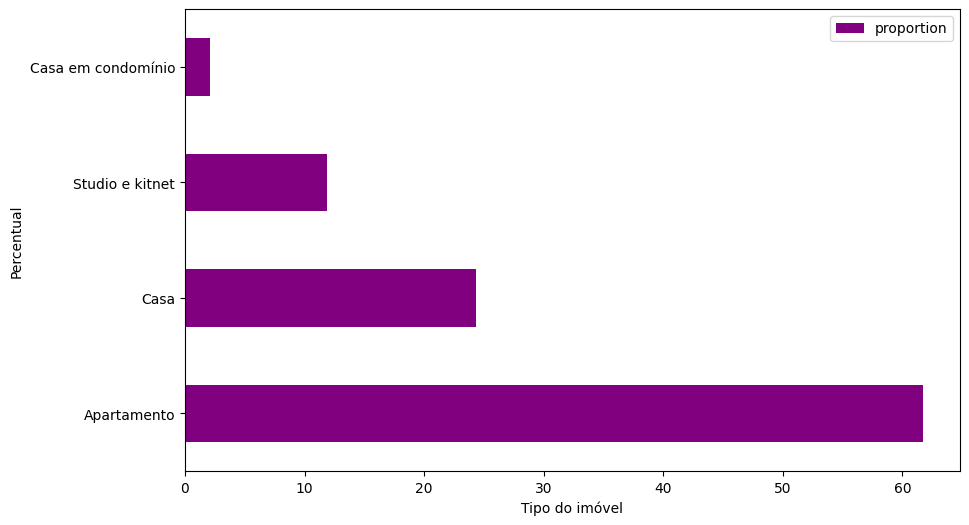

In [ ]:
df_percentual_tipo.plot(kind='barh', figsize=(10,6), color='purple',
                        xlabel= 'Tipo do imóvel', ylabel='Percentual')

In [ ]:
dados_total_tipo = dados_sem_aluguel.groupby('tipo')[['total']].mean().sort_values('total')
dados_total_tipo

,total
tipo,
Studio e kitnet,2668.280232
Casa,3824.244280
Apartamento,4435.428413
Casa em condomínio,4576.232365


<Axes: ylabel='tipo'>

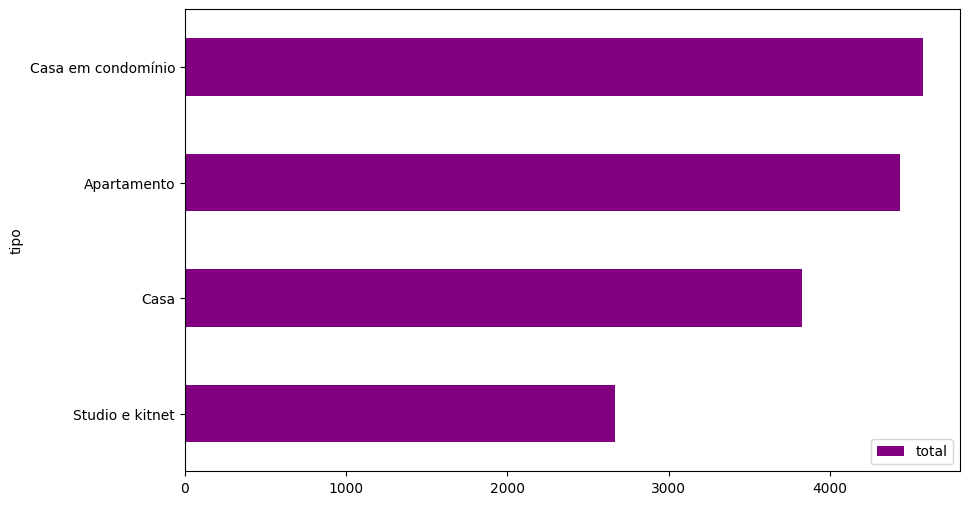

In [ ]:
dados_total_tipo.plot(kind='barh', figsize=(10,6), color='purple')

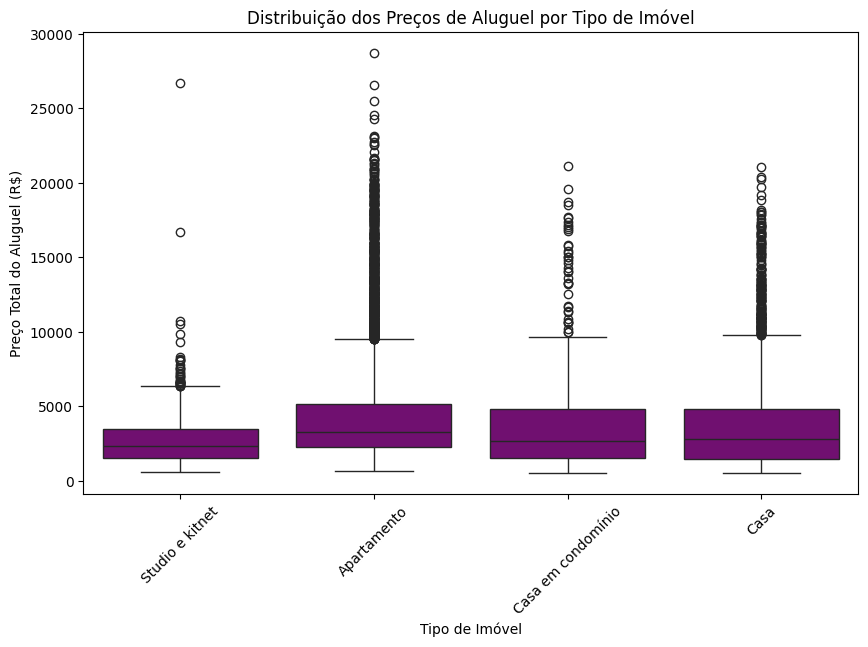

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_sem_aluguel, x='tipo', y='total', color='purple')
plt.title('Distribuição dos Preços de Aluguel por Tipo de Imóvel')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Preço Total do Aluguel (R$)')
plt.xticks(rotation=45)
plt.show()


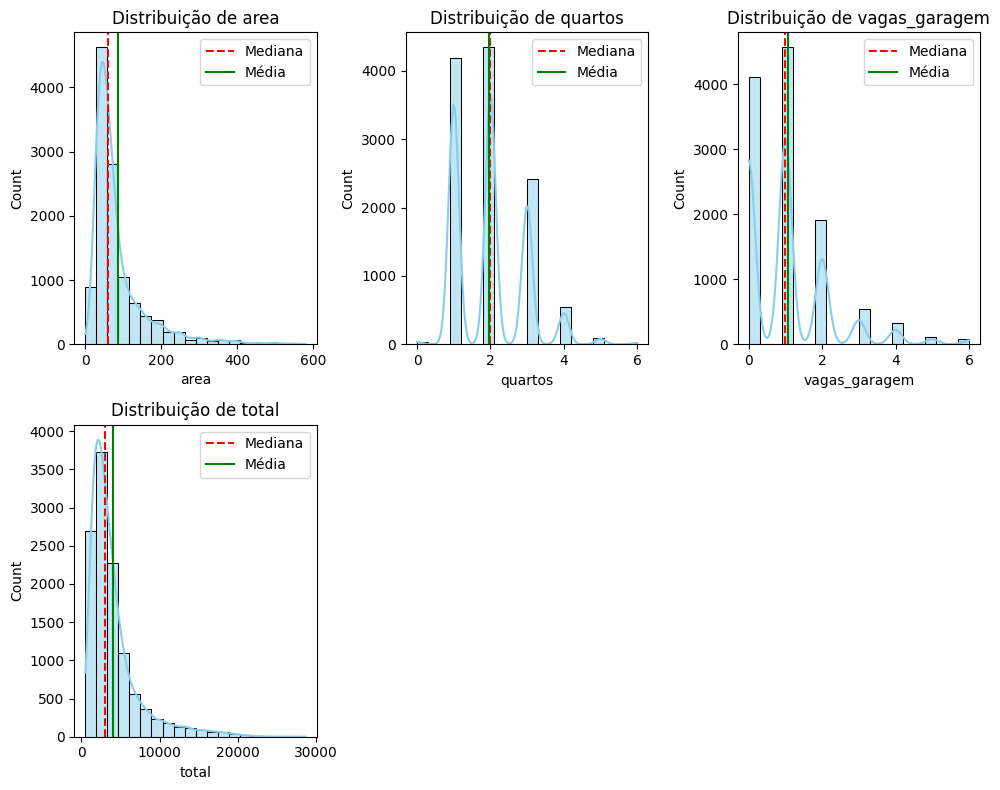

In [ ]:
variaveis_numericas = ['area', 'quartos', 'vagas_garagem', 'total']

plt.figure(figsize=(10, 8))

# Loop sobre as variáveis numéricas para criar os gráficos
for i, var in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 3, i)

    sns.histplot(dados_sem_aluguel[var], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribuição de {var}')

    plt.axvline(dados_sem_aluguel[var].median(), color='red', linestyle='--', label='Mediana')
    plt.axvline(dados_sem_aluguel[var].mean(), color='green', linestyle='-', label='Média')

    plt.legend()

plt.tight_layout()

plt.show()


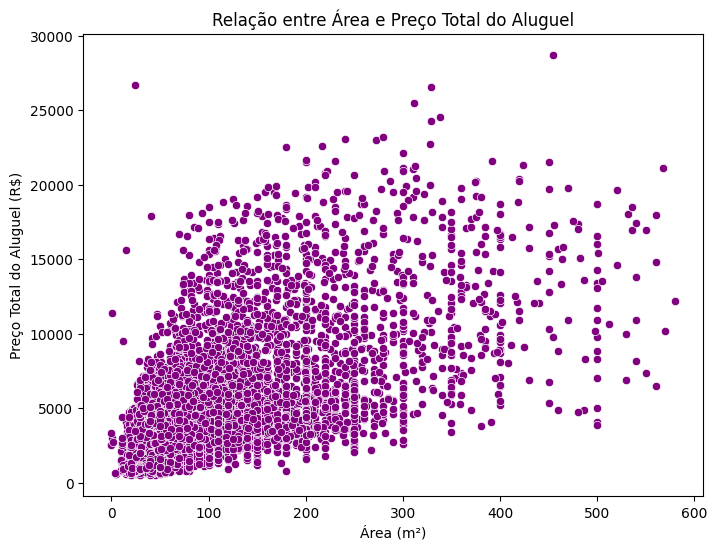

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_sem_aluguel, x='area', y='total', color='purple')
plt.title('Relação entre Área e Preço Total do Aluguel')
plt.xlabel('Área (m²)')
plt.ylabel('Preço Total do Aluguel (R$)')
plt.show()


In [ ]:
dados_numericos = dados_sem_aluguel.select_dtypes(include=['int64', 'float64'])
correlacao = dados_numericos.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

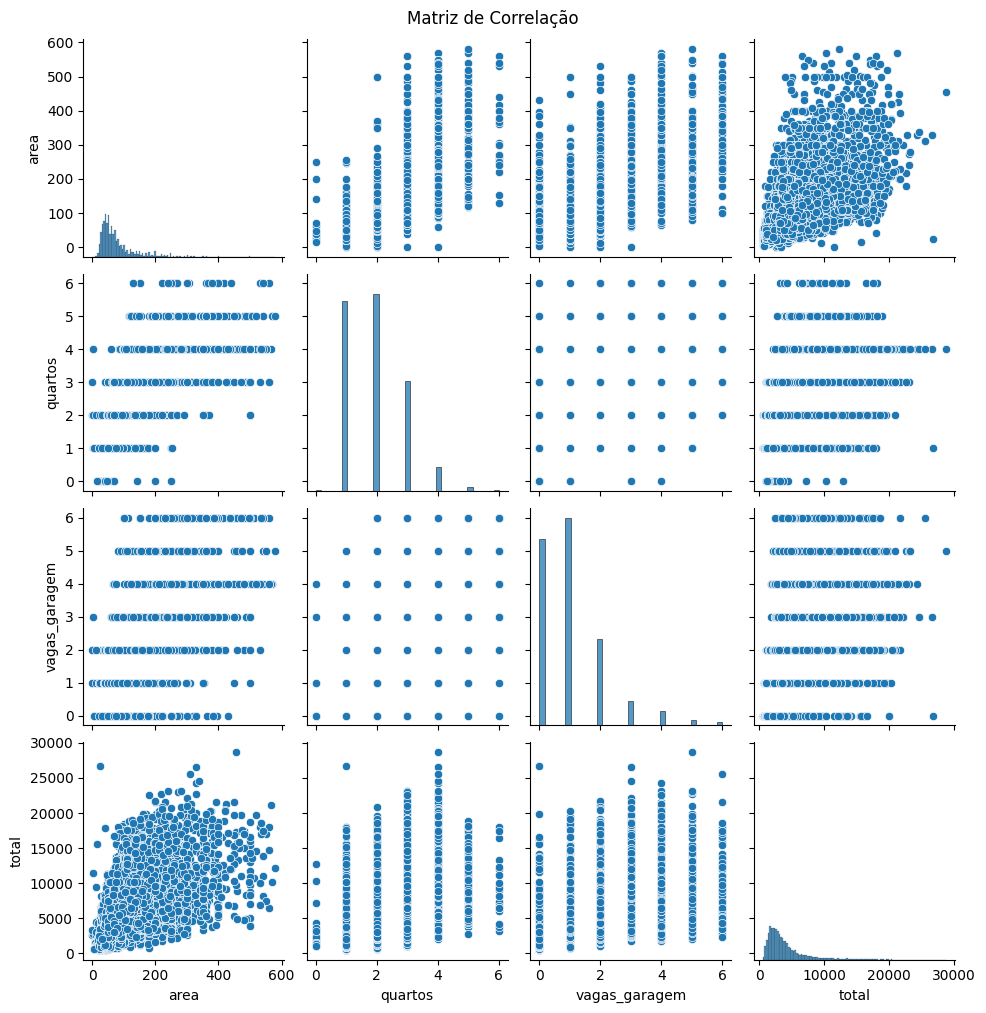

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(dados_numericos)
plt.suptitle('Matriz de Correlação', y=1.01)
plt.show

In [ ]:
#Modelagem de Regressão Linear
from sklearn.model_selection import  train_test_split

X = dados[['area', 'quartos', 'vagas_garagem']]
y = dados['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_previsto = modelo.predict(X_test)
y_previsto

array([3553.9274606 , 2895.57540298, 3812.07303587, ..., 5463.29752913,
       3324.80305238, 3013.89506506])

In [ ]:
R2 = r2_score(y_test, y_previsto)
print("Coeficiente de Determinação R²:", R2)

Coeficiente de Determinação R²: 0.45509741587703045


In [ ]:
mse = mean_squared_error(y_test, y_previsto)
print("Erro Quadrático Médio MSE:", mse)

Erro Quadrático Médio MSE: 6083920.38910355


In [ ]:
rmse = mean_squared_error(y_test, y_previsto, squared=False)
print("Raiz do erro Quadrático Médio RMSE:", rmse)

Raiz do erro Quadrático Médio RMSE: 2466.5604369452517
